Epoch [1/100], Loss: 0.0177
Epoch [2/100], Loss: 0.0067
Epoch [3/100], Loss: 0.0029
Epoch [4/100], Loss: 0.0046
Epoch [5/100], Loss: 0.0093
Epoch [6/100], Loss: 0.0055
Epoch [7/100], Loss: 0.0025
Epoch [8/100], Loss: 0.0051
Epoch [9/100], Loss: 0.0019
Epoch [10/100], Loss: 0.0031
Epoch [11/100], Loss: 0.0020
Epoch [12/100], Loss: 0.0036
Epoch [13/100], Loss: 0.0029
Epoch [14/100], Loss: 0.0034
Epoch [15/100], Loss: 0.0018
Epoch [16/100], Loss: 0.0017
Epoch [17/100], Loss: 0.0018
Epoch [18/100], Loss: 0.0032
Epoch [19/100], Loss: 0.0011
Epoch [20/100], Loss: 0.0029
Epoch [21/100], Loss: 0.0114
Epoch [22/100], Loss: 0.0033
Epoch [23/100], Loss: 0.0038
Epoch [24/100], Loss: 0.0033
Epoch [25/100], Loss: 0.0018
Epoch [26/100], Loss: 0.0022
Epoch [27/100], Loss: 0.0013
Epoch [28/100], Loss: 0.0011
Epoch [29/100], Loss: 0.0018
Epoch [30/100], Loss: 0.0037
Epoch [31/100], Loss: 0.0036
Epoch [32/100], Loss: 0.0008
Epoch [33/100], Loss: 0.0023
Epoch [34/100], Loss: 0.0012
Epoch [35/100], Loss: 0

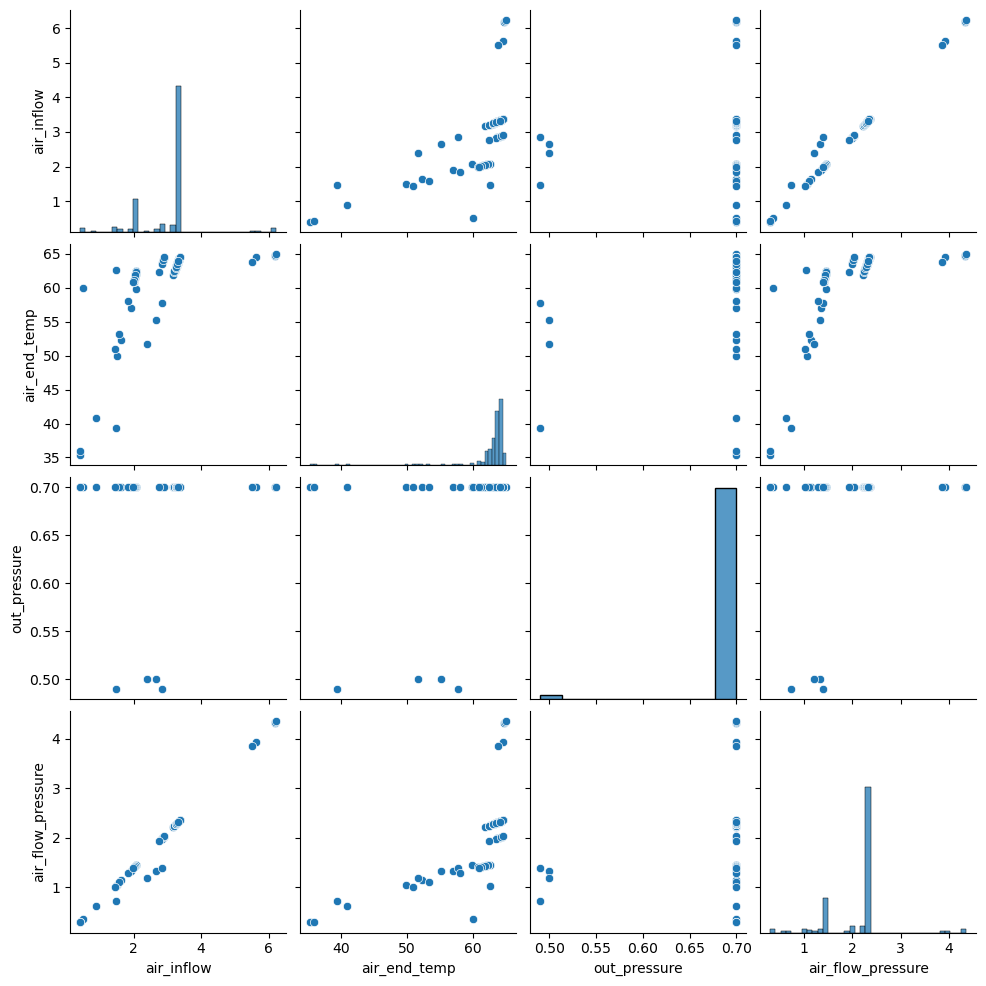

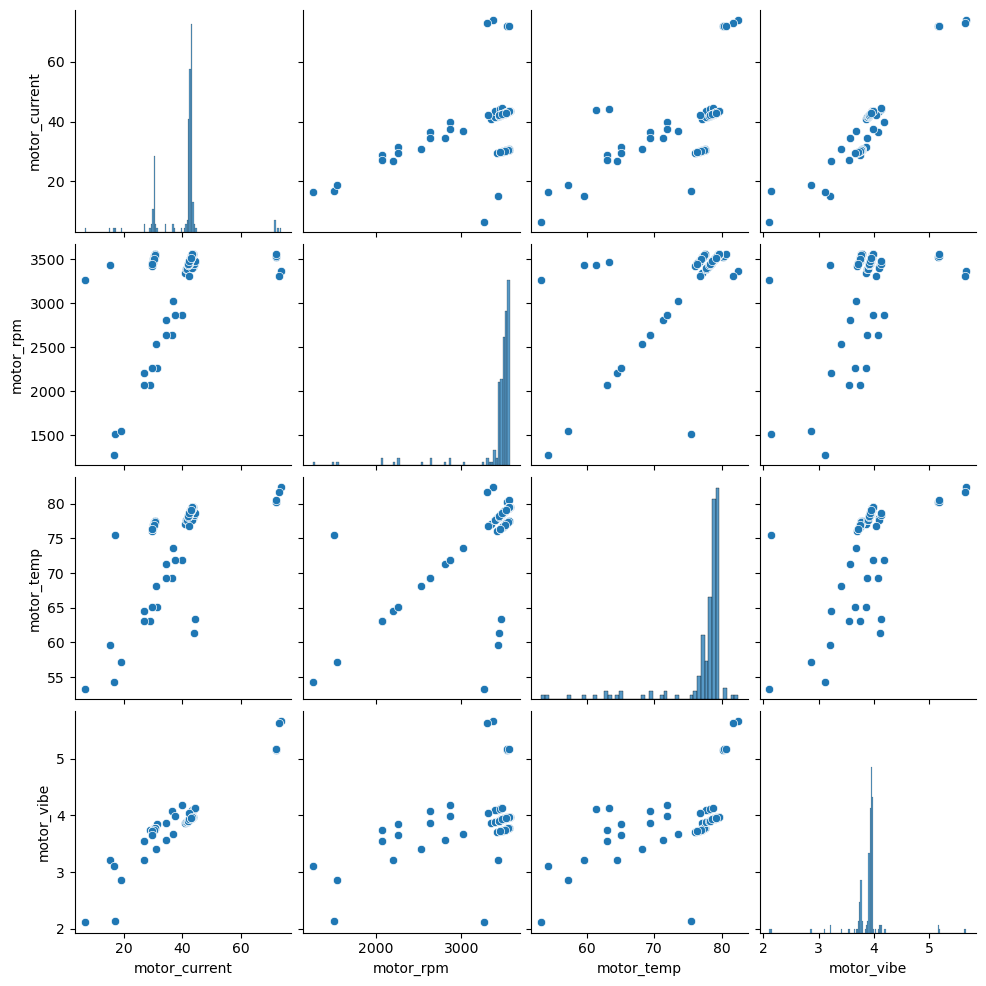

In [1]:
import warnings

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import torch
import torch.nn as nn
import torch.optim as optim

from src.features import build_features
from src.models import predict_model
from src.train.train import train, evaluation, prediction_to_csv
from src.data.make_dataset import DatasetLoader
from src.visualization.visual import anomaly_plot
from src.config.config import seed_everything, cfg
from datetime import datetime

warnings.filterwarnings(action='ignore')
seed_everything(cfg.SEED)

scaler = MinMaxScaler()

# 데이터 전처리
data = pd.read_csv(r'data\raw\train_data.csv')
data = build_features.add_air_flow_pressure(data)
data = build_features.add_motor_hp(data)
# data = build_features.add_motor_vibe_freq(data)
data = data.drop("type", axis=1)
scaled_data = scaler.fit_transform(data)
test_data = pd.read_csv(r'data\raw\test_data.csv')
test_data = build_features.add_air_flow_pressure(test_data)
test_data = build_features.add_motor_hp(test_data)
# test_data = build_features.add_motor_vibe_freq(test_data)
test_data = test_data.drop("type", axis=1)
scaled_test_data = scaler.transform(test_data)
n_features = data.shape[1]

# 데이터 로더
dataloader = DatasetLoader(scaled_data, scaled_test_data)
train_loader, test_loader = dataloader.load

# 학습 파라미터
model = predict_model.AutoEncoder(input_dim=n_features, latent_dim=128)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

# 학습
train(train_loader, model, criterion, optimizer)

# 예측
prediction = evaluation(test_loader, model)

# 제출
prediction_to_csv(prediction)

# plot
anomaly_plot(test_data, prediction)

